### Fake currency classification using Support vector classifier.

In [1]:
import os
from numpy import array
from cv2 import imread, resize

### Loading and preparing dataset and labels.

In [2]:
LABELS = ['fake_front', 'fake_rear', 'real_front', 'real_rear']
DIR = './dataset'
DATASET = []
LABELS_SET = []

# Rescaling and reshaping loaded data. 

for label in LABELS :
    dir_path = os.path.join(DIR, label)

    for item in os.listdir(dir_path) :
        img_path = os.path.join(dir_path, item)
        img = imread(img_path, 0)
        img = resize(img, (400, 200))
        img = array(img) / 255.0 # re scale
        img = img.flatten().tolist()
        DATASET.append(img)
        LABELS_SET.append(LABELS.index(label))

### Train and Test set spliting

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

x_train, x_test, y_train, y_test = train_test_split(DATASET, LABELS_SET, train_size=0.80, test_size=0.20)

In [13]:
print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

Training samples: 867
Testing samples: 217


Support vector classifier using polynomial kernel.

In [14]:
model = SVC(C=1, degree=3, kernel='poly').fit(x_train, y_train)

#### Prediction of test samples.

In [15]:
prediction = model.predict(x_test)

#### Result summary

In [16]:
cm = confusion_matrix(y_true=y_test, y_pred=prediction)
acc = accuracy_score(y_test, prediction)
f1_sc= f1_score(y_test, prediction, average='weighted')
rec_sc = recall_score(y_test, prediction, average='weighted')
pre_sc = precision_score(y_test, prediction, average='weighted')

In [17]:
print('Accuracy (Polynomial Kernel): ', "%.2f" % (acc*100))
print('Precision : ', "%.2f" % (pre_sc*100))
print('Recall score: ', "%.2f" % (rec_sc*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (f1_sc*100))

Accuracy (Polynomial Kernel):  93.55
Precision :  94.07
Recall score:  93.55
F1 (Polynomial Kernel):  93.60


#### Confusion matrix

<Axes: >

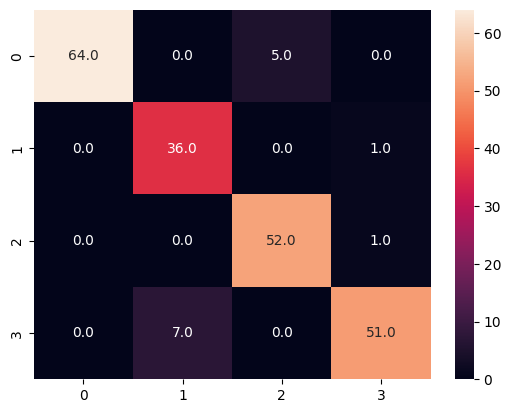

In [18]:
from seaborn import heatmap

heatmap(cm, annot=True, fmt='.1f')

Saving model

In [19]:
from joblib import dump

dump(model, 'svc_model.joblib')

['svc_model.joblib']